<a href="https://colab.research.google.com/github/dtabuena/EphysLib/blob/main/Fast_Live_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'Get Standard Modules'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import os
from scipy.signal import butter,filtfilt
from tqdm import tqdm
import warnings
from IPython.display import clear_output
from datetime import datetime
import sys
import warnings
import shutil
from google.colab import files
warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)
clear_output(wait=False)



!pip install openpyxl
!pip install XlsxWriter


'''Get Repositories'''
try: shutil.rmtree('/content/EphysLib')
except: None

"run dtabuena's ephys notebooks"
!git clone https://github.com/dtabuena/EphysLib
to_import = [
            'ABF_Quality_Control.ipynb',
            'Basic_Ephys.ipynb',
            'Simple_ABF_tools.ipynb',
            'fun_math.ipynb',
            'importing_abfs_from_dropbox.ipynb',
            'QC_recoding_dataframe.ipynb',
            'Analyzers/input_resistance_analyzer.ipynb',
            'Analyzers/gain_analyzer.ipynb',
            'Analyzers/latencey_analyzer.ipynb',
            'Analyzers/IV_analyzer.ipynb',
            'Analyzers/Vm_analyzer.ipynb',
            'Analyzers/membrane_analyzer.ipynb',
            'Analyzers/rheobase_analyzer.ipynb',
            ]
for i in to_import:
    f = '/content/EphysLib/' + i
    %run $f


try: shutil.rmtree('/content/CrispyMice')
except: None
!git clone https://github.com/dtabuena/CrispyMice
to_import = ['CrispyPipelineFuncs.ipynb']
for i in to_import:
    f = '/content/CrispyMice/' + i
    %run $f


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 8.8 MB/s 
Cloning into 'EphysLib'...
remote: Enumerating objects: 532, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 532 (delta 160), reused 54 (delta 54), pack-reused 307
Receiving objects: 100% (532/532), 1.03 MiB | 6.29 MiB/s, done.
Resolving deltas: 100% (334/334), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.9 MB/s 
Cloning into 'CrispyMice'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 227 (delta 85), reused 25 (delta 25), pack-reused 107
Receiving objects

In [2]:
##### Setup Protocol List
VC_prot = ['VC - MemTest-10ms-160ms',
           'VC - Multi IV - 150ms',]
IC_prot = ['IC - Gain - D20pA',
           'IC - Gain - D50pA',
           'IC - Rheobase',
           'IC - R input',
           'IC - Latentcy 800pA-1s'
           'VC - 3min GapFree']

--2022-10-27 00:26:25--  https://www.dropbox.com/sh/kdyo8a4gy4krpp8/AAD-ra8gZJpdsEKq-jk-Yk_da?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/kdyo8a4gy4krpp8/AAD-ra8gZJpdsEKq-jk-Yk_da [following]
--2022-10-27 00:26:25--  https://www.dropbox.com/sh/raw/kdyo8a4gy4krpp8/AAD-ra8gZJpdsEKq-jk-Yk_da
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb0fb4ffa292e08a2af0321a122.dl.dropboxusercontent.com/zip_download_get/BS_TMkQwAnFcdyH0X2XsQ6TASSP9qXbP-W0gXu7VXoj_o74Pb9T-Skl_t5FKGP6N_Z0AMIRdxk9c6ffMP46aK0cbxMzxU_mvF26LgvU4Vve0BQ# [following]
--2022-10-27 00:26:27--  https://ucb0fb4ffa292e08a2af0321a122.dl.dropboxusercontent.com/zip_download_get/BS_TMkQwAnFcdyH0X2XsQ6TASSP9qXbP-W0gXu7VXoj_o74Pb9T-Skl_t5FKGP6N_Z0AMIRdxk9c6ffMP46aK0cbx

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/157 [00:00<?, ?it/s]

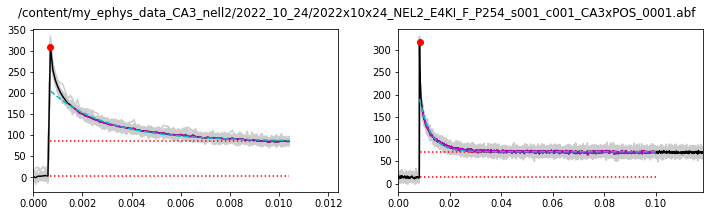

  1%|▏         | 2/157 [00:00<01:08,  2.26it/s]

<Figure size 432x288 with 0 Axes>

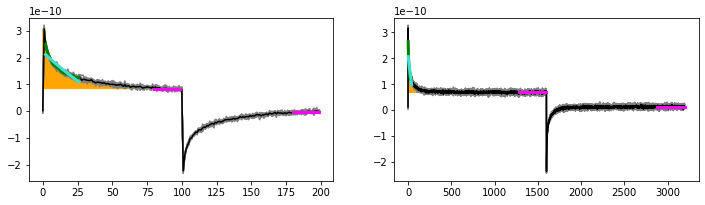

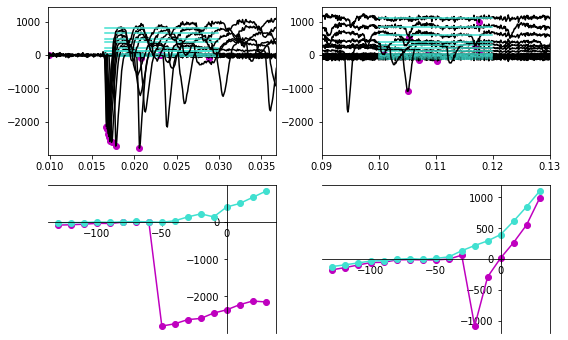

  2%|▏         | 3/157 [00:02<02:11,  1.17it/s]

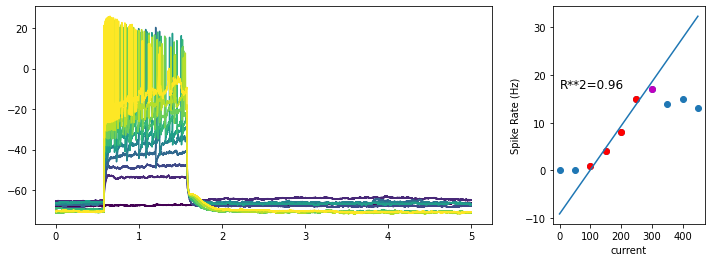

  3%|▎         | 4/157 [00:04<03:54,  1.53s/it]

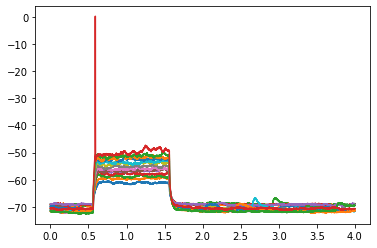

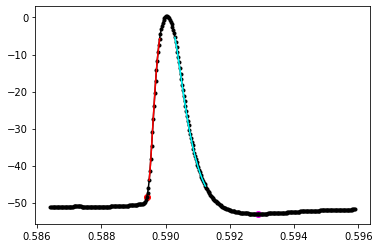

  3%|▎         | 5/157 [00:10<07:15,  2.87s/it]

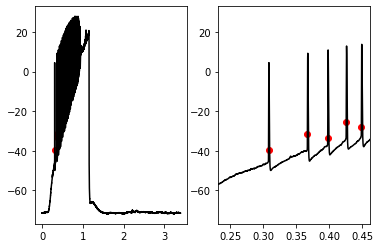

  4%|▍         | 7/157 [00:12<04:38,  1.85s/it]

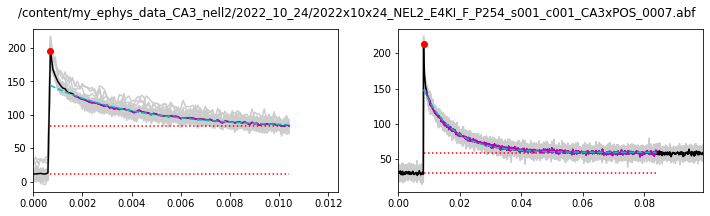

  5%|▌         | 8/157 [00:13<03:54,  1.57s/it]

<Figure size 432x288 with 0 Axes>

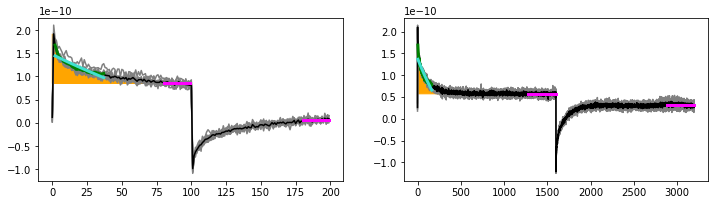

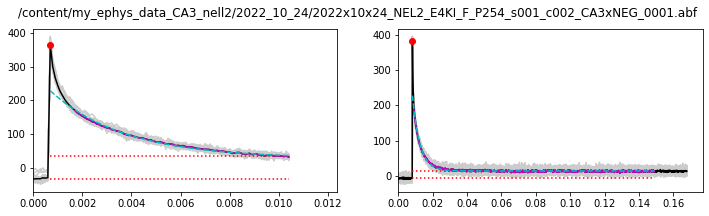

  6%|▋         | 10/157 [00:14<02:39,  1.09s/it]

<Figure size 432x288 with 0 Axes>

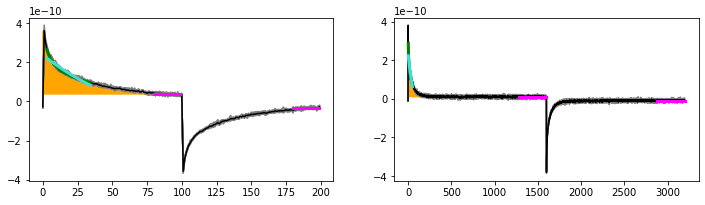

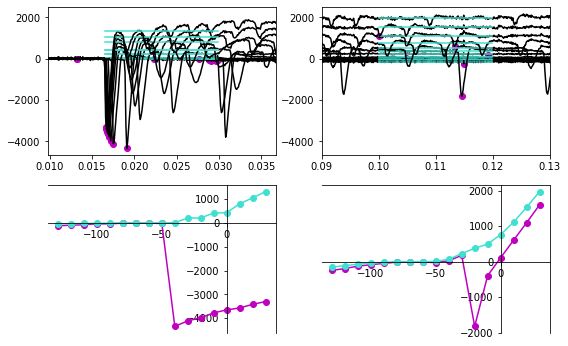

  7%|▋         | 11/157 [00:15<02:47,  1.15s/it]

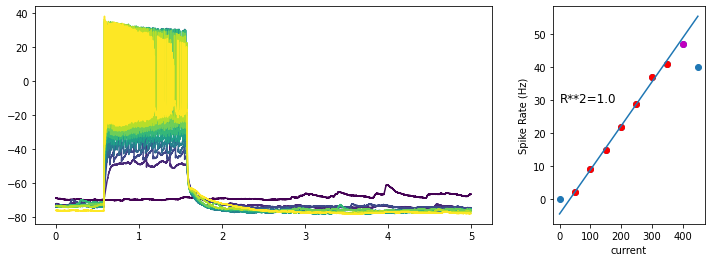

  8%|▊         | 12/157 [00:18<03:43,  1.54s/it]

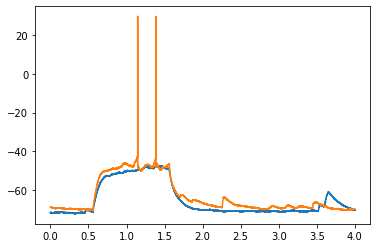

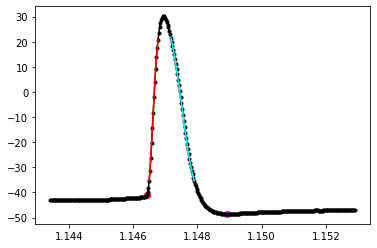

  8%|▊         | 13/157 [00:21<04:44,  1.97s/it]

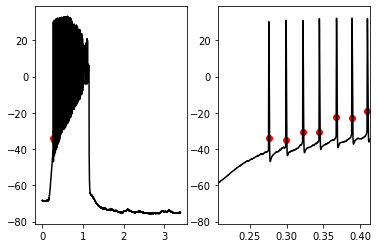

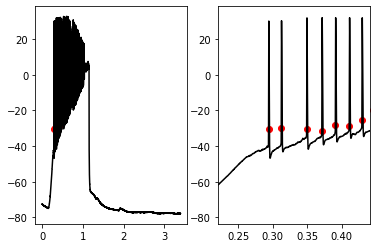

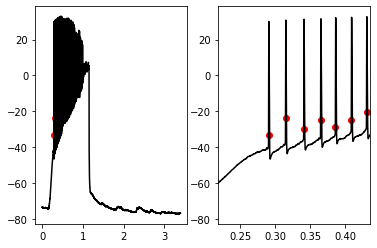

  9%|▉         | 14/157 [00:22<04:22,  1.83s/it]

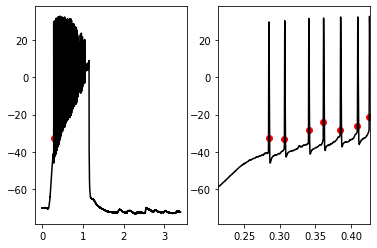

 10%|█         | 16/157 [00:24<03:21,  1.43s/it]

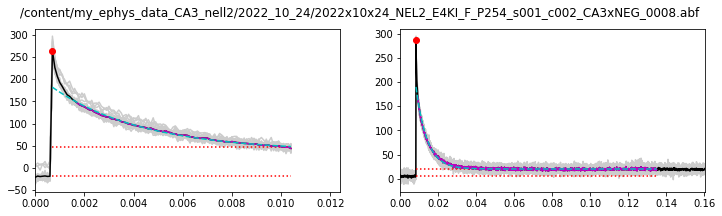

 11%|█         | 17/157 [00:25<02:57,  1.27s/it]

<Figure size 432x288 with 0 Axes>

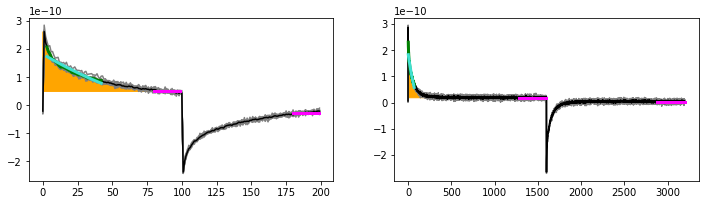

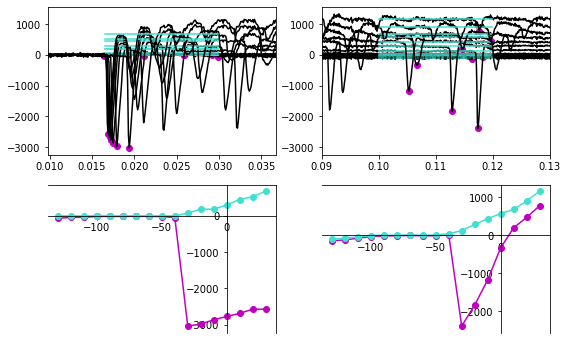

 11%|█▏        | 18/157 [00:27<03:02,  1.31s/it]

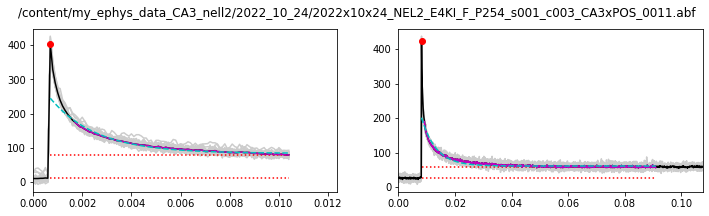

 13%|█▎        | 20/157 [00:27<02:03,  1.11it/s]

<Figure size 432x288 with 0 Axes>

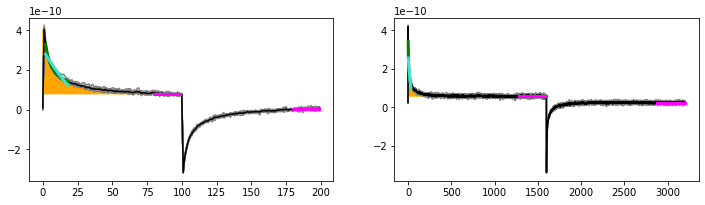

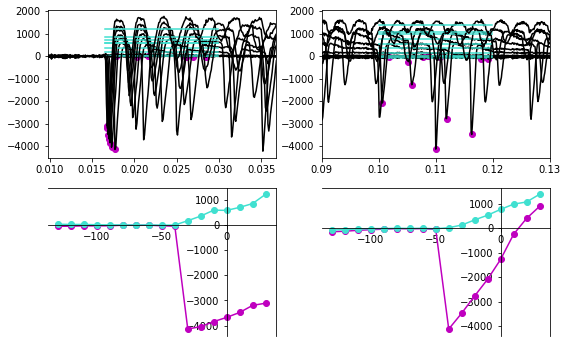

 13%|█▎        | 21/157 [00:29<02:17,  1.01s/it]

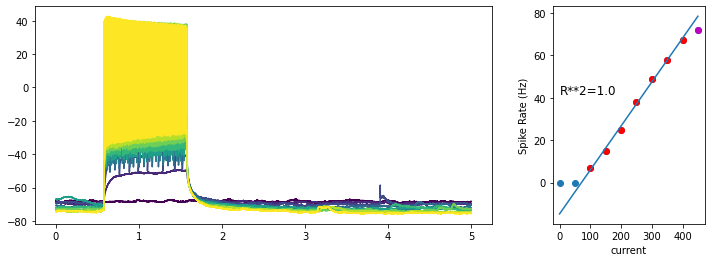

 14%|█▍        | 22/157 [00:31<03:13,  1.43s/it]

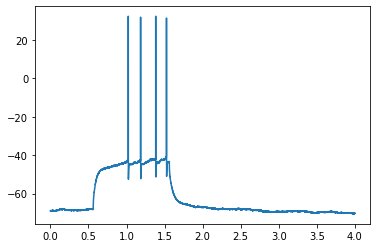

 15%|█▍        | 23/157 [00:32<02:29,  1.12s/it]

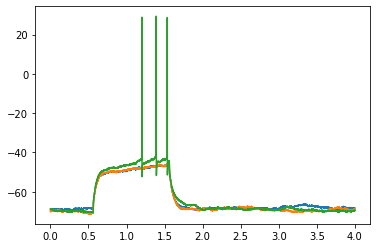

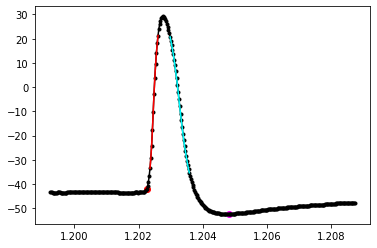

 15%|█▌        | 24/157 [00:35<03:50,  1.74s/it]

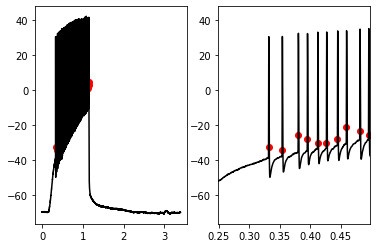

 17%|█▋        | 26/157 [00:37<03:01,  1.39s/it]

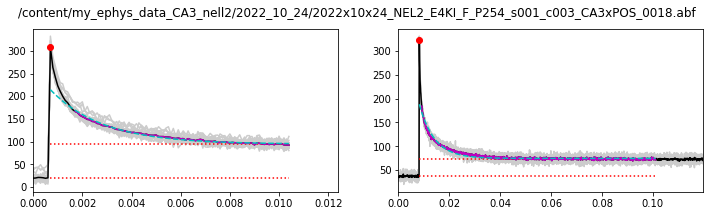

 17%|█▋        | 27/157 [00:38<02:39,  1.23s/it]

<Figure size 432x288 with 0 Axes>

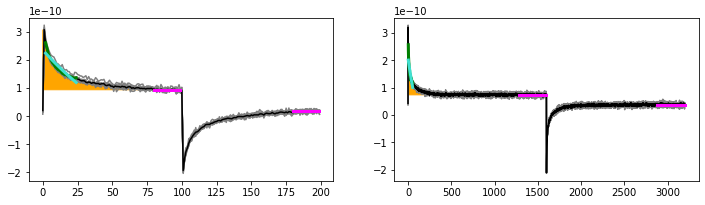

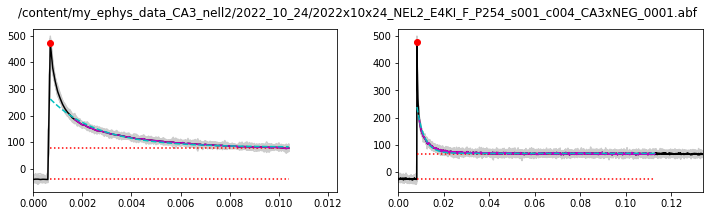

 18%|█▊        | 29/157 [00:39<01:57,  1.09it/s]

<Figure size 432x288 with 0 Axes>

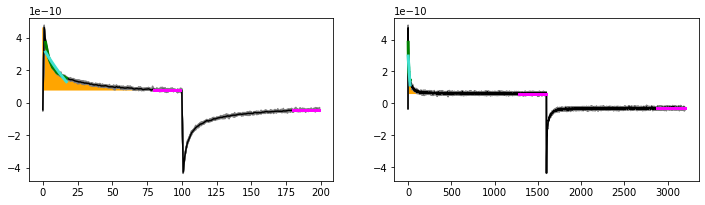

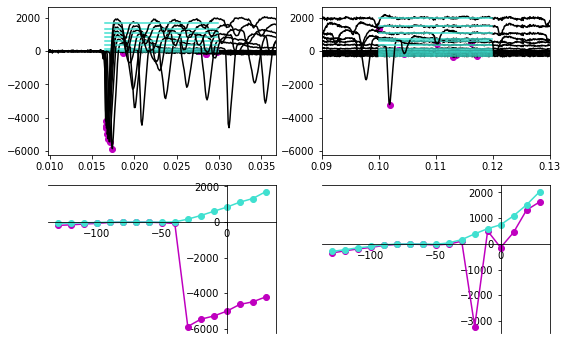

 19%|█▉        | 30/157 [00:40<02:12,  1.05s/it]

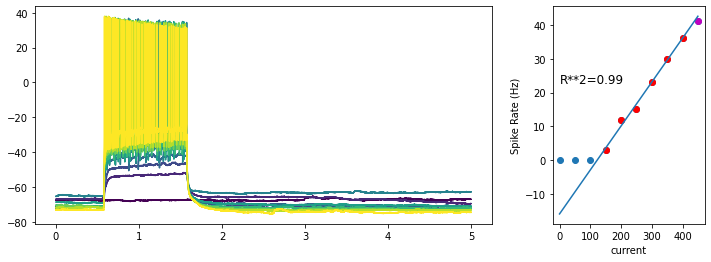

 20%|█▉        | 31/157 [00:43<03:16,  1.56s/it]

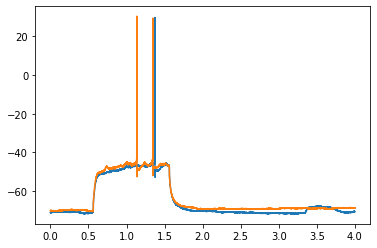

 20%|██        | 32/157 [00:44<02:50,  1.36s/it]

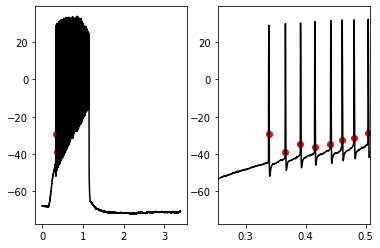

 21%|██        | 33/157 [00:45<02:19,  1.13s/it]

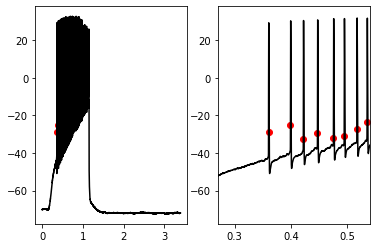

 22%|██▏       | 35/157 [00:46<02:11,  1.08s/it]

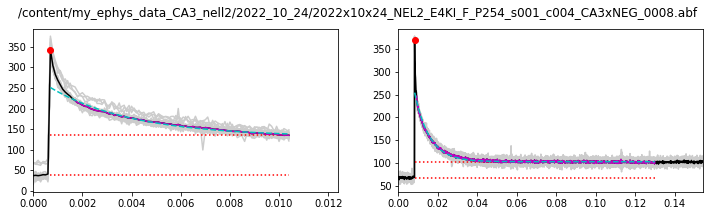

 23%|██▎       | 36/157 [00:47<02:06,  1.05s/it]

<Figure size 432x288 with 0 Axes>

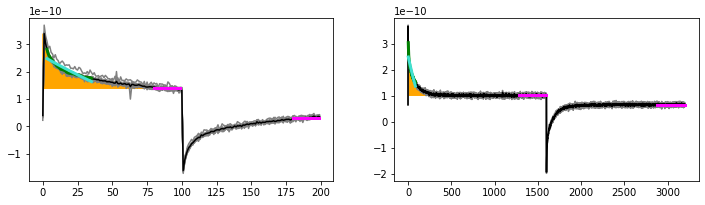

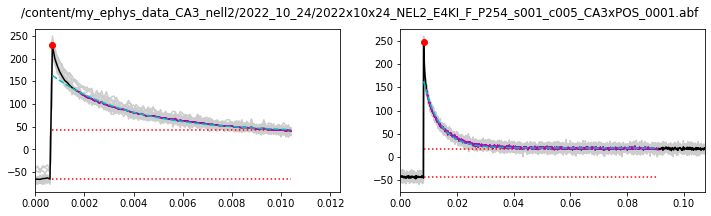

 24%|██▍       | 38/157 [00:49<01:37,  1.22it/s]

<Figure size 432x288 with 0 Axes>

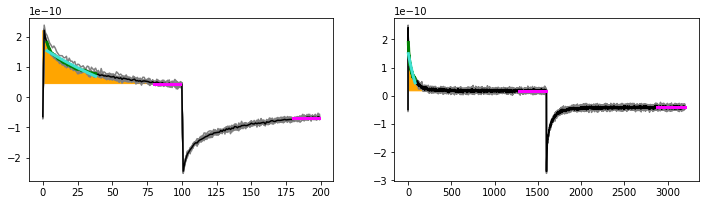

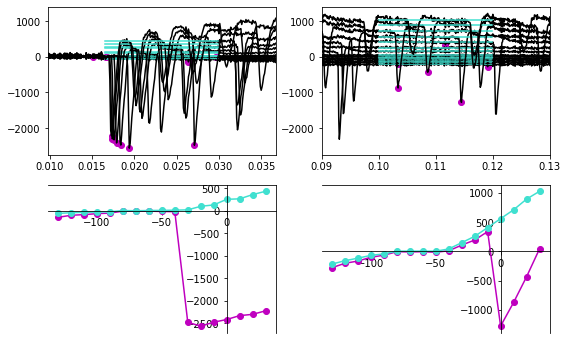

 25%|██▍       | 39/157 [00:50<01:52,  1.05it/s]

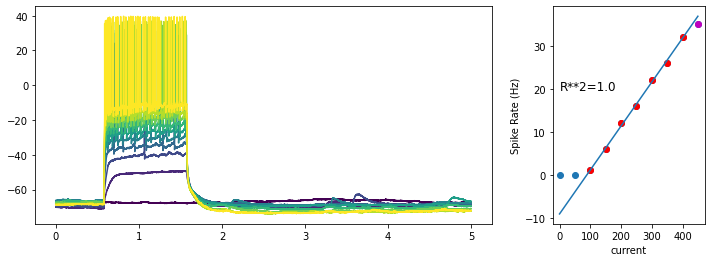

 25%|██▌       | 40/157 [00:53<02:42,  1.39s/it]

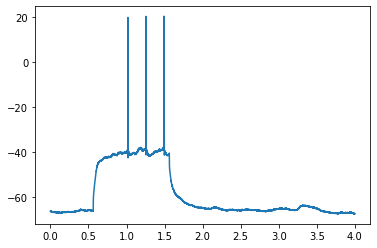

 26%|██▌       | 41/157 [00:53<02:06,  1.09s/it]

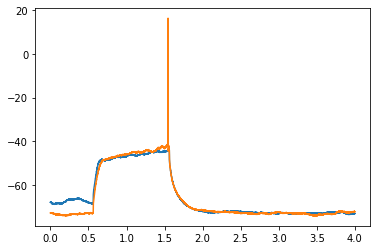

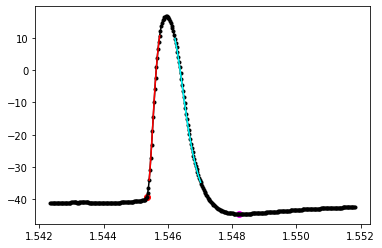

 27%|██▋       | 42/157 [00:56<03:12,  1.67s/it]

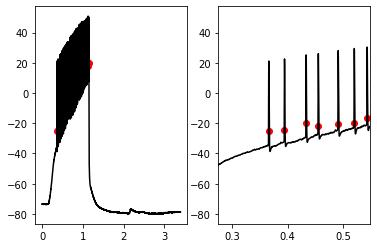

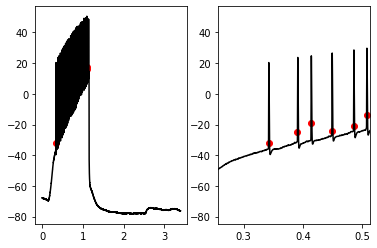

 27%|██▋       | 43/157 [00:57<02:49,  1.49s/it]

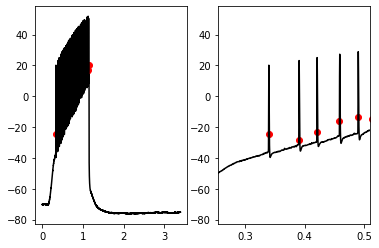

 29%|██▊       | 45/157 [00:59<02:21,  1.26s/it]

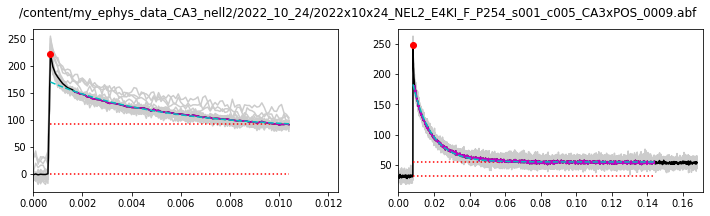

 29%|██▉       | 46/157 [01:00<02:06,  1.14s/it]

<Figure size 432x288 with 0 Axes>

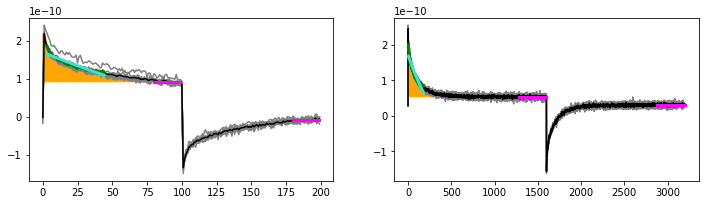

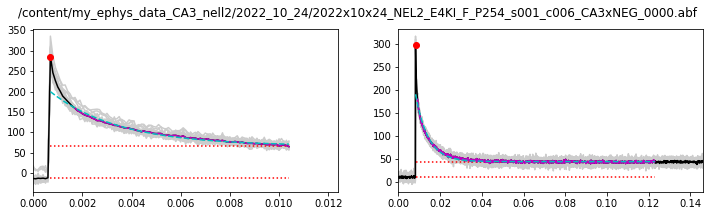

 30%|██▉       | 47/157 [01:01<02:06,  1.15s/it]

<Figure size 432x288 with 0 Axes>

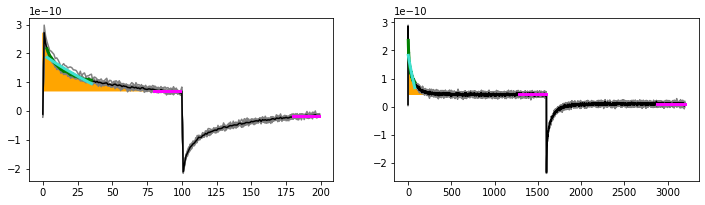

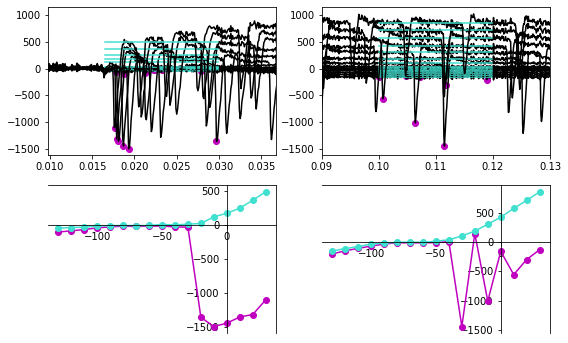

 31%|███       | 49/157 [01:02<01:42,  1.05it/s]

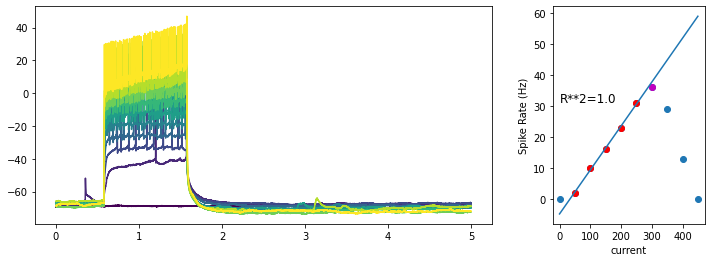

 32%|███▏      | 50/157 [01:05<02:25,  1.36s/it]

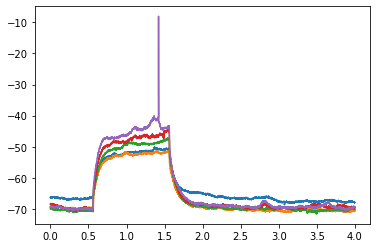

 33%|███▎      | 52/157 [01:06<01:46,  1.01s/it]

no spikes found


 34%|███▍      | 53/157 [01:08<01:55,  1.11s/it]

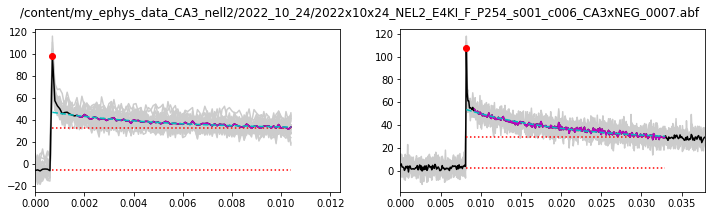

 34%|███▍      | 54/157 [01:09<01:51,  1.08s/it]

<Figure size 432x288 with 0 Axes>

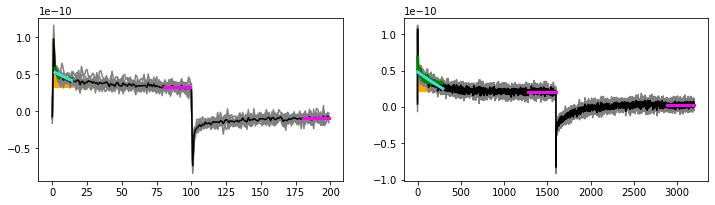

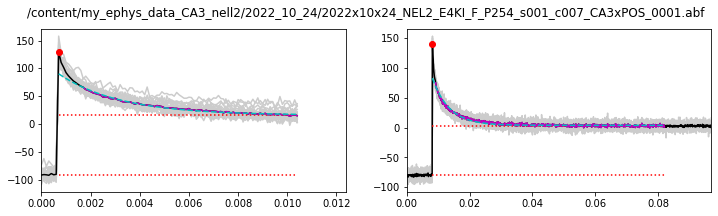

 36%|███▌      | 56/157 [01:10<01:25,  1.18it/s]

<Figure size 432x288 with 0 Axes>

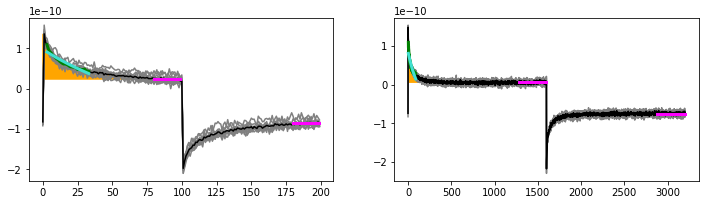

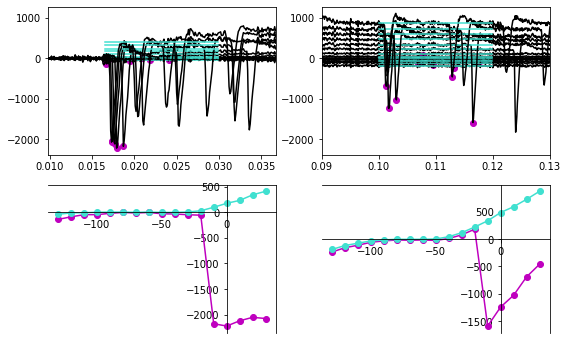

 36%|███▋      | 57/157 [01:11<01:37,  1.03it/s]

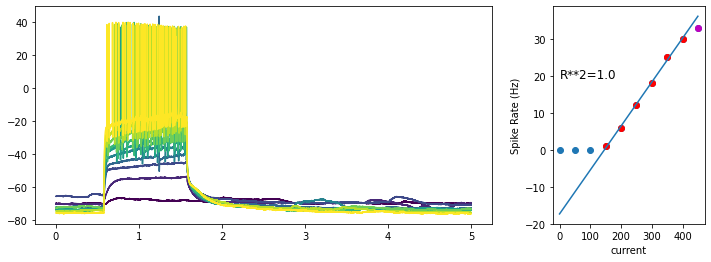

 37%|███▋      | 58/157 [01:14<02:19,  1.40s/it]

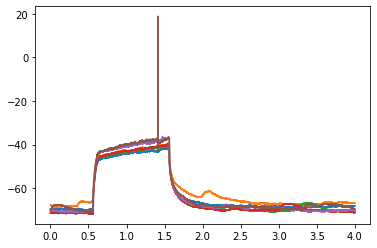

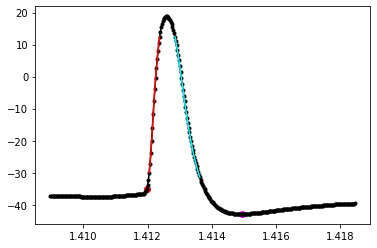

 38%|███▊      | 59/157 [01:18<03:24,  2.08s/it]

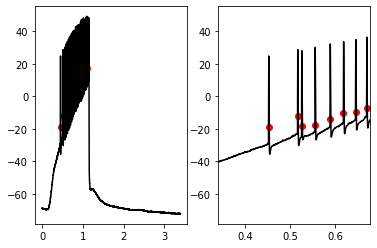

 39%|███▉      | 61/157 [01:20<02:31,  1.58s/it]

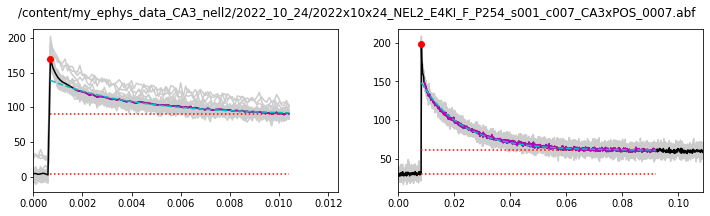

 39%|███▉      | 62/157 [01:21<02:10,  1.37s/it]

<Figure size 432x288 with 0 Axes>

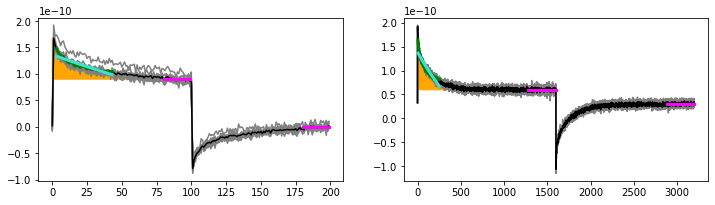

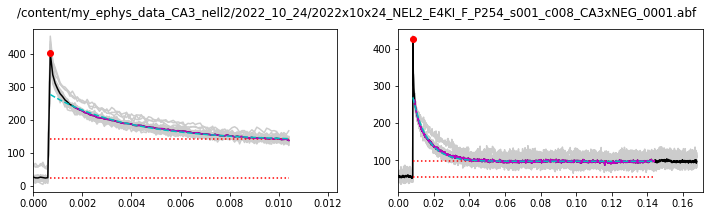

 40%|████      | 63/157 [01:22<02:13,  1.42s/it]

<Figure size 432x288 with 0 Axes>

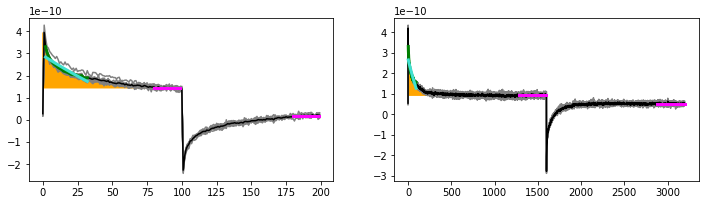

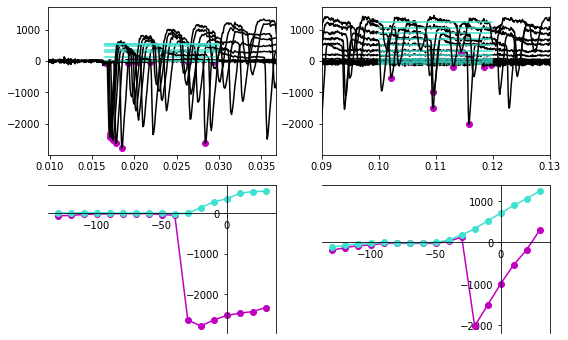

 41%|████      | 64/157 [01:24<02:29,  1.61s/it]

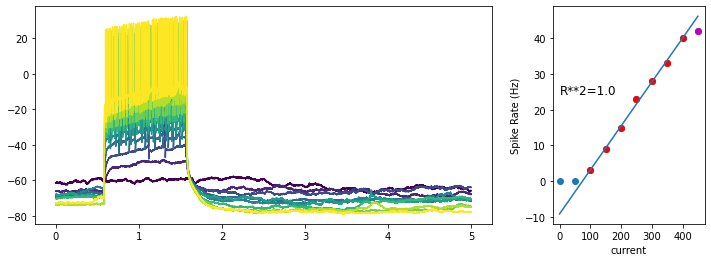

 41%|████▏     | 65/157 [01:27<02:55,  1.91s/it]

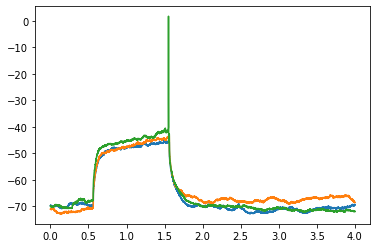

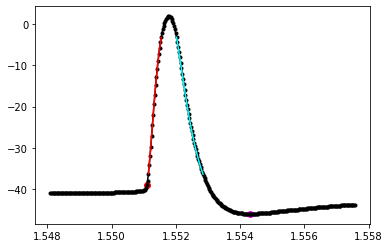

 42%|████▏     | 66/157 [01:30<03:31,  2.33s/it]

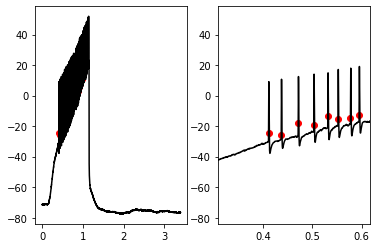

 43%|████▎     | 67/157 [01:31<02:41,  1.80s/it]

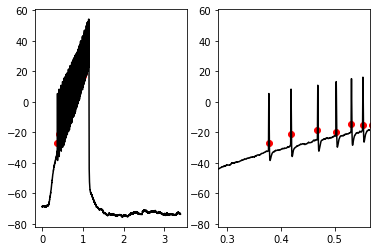

 43%|████▎     | 68/157 [01:31<02:06,  1.43s/it]

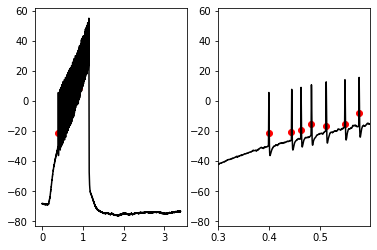

 45%|████▍     | 70/157 [01:33<01:47,  1.24s/it]

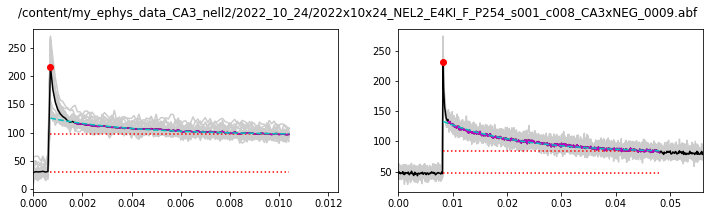

 45%|████▌     | 71/157 [01:34<01:36,  1.12s/it]

<Figure size 432x288 with 0 Axes>

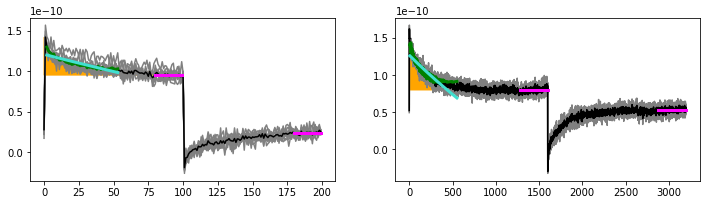

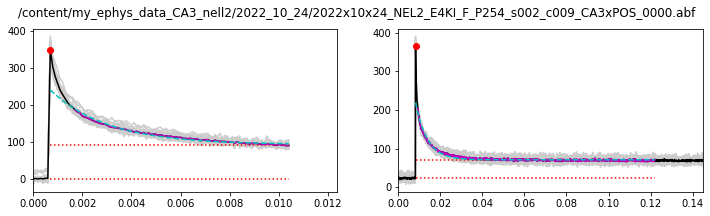

 46%|████▌     | 72/157 [01:35<01:37,  1.15s/it]

<Figure size 432x288 with 0 Axes>

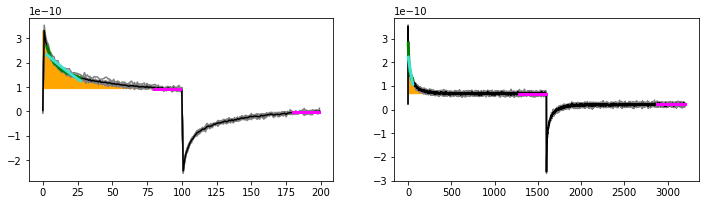

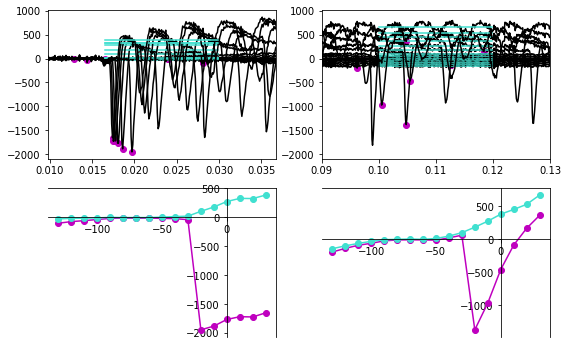

 47%|████▋     | 74/157 [01:37<01:18,  1.05it/s]

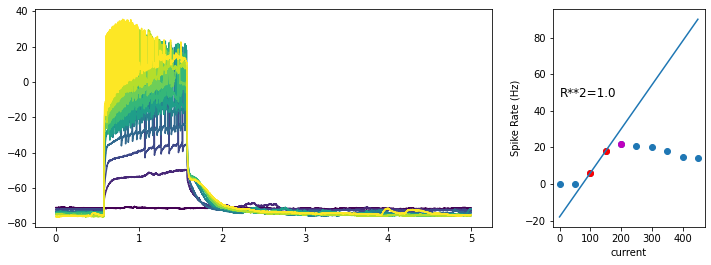

 48%|████▊     | 75/157 [01:39<01:53,  1.38s/it]

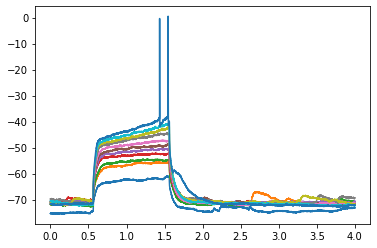

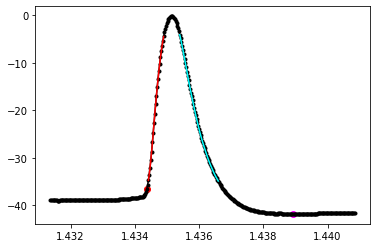

 48%|████▊     | 76/157 [01:44<03:02,  2.26s/it]

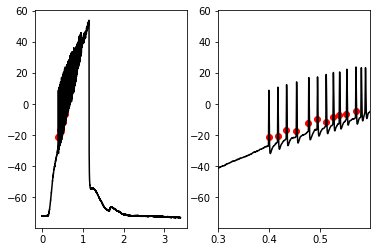

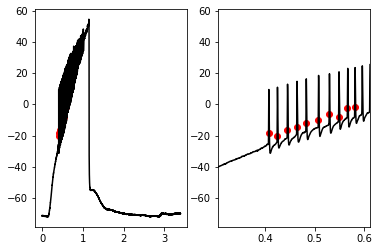

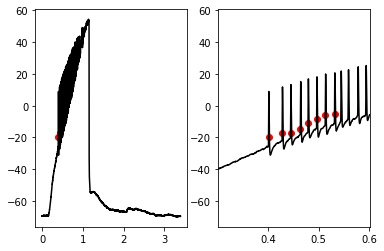

 50%|████▉     | 78/157 [01:47<02:30,  1.91s/it]

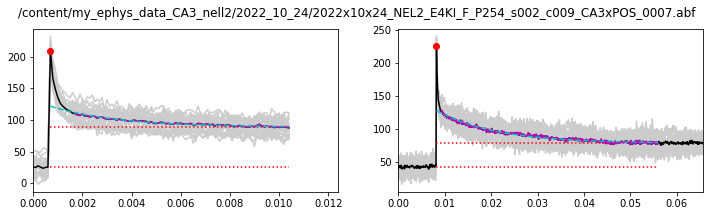

 50%|█████     | 79/157 [01:48<02:05,  1.61s/it]

<Figure size 432x288 with 0 Axes>

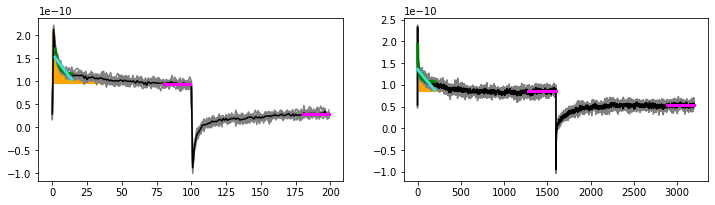

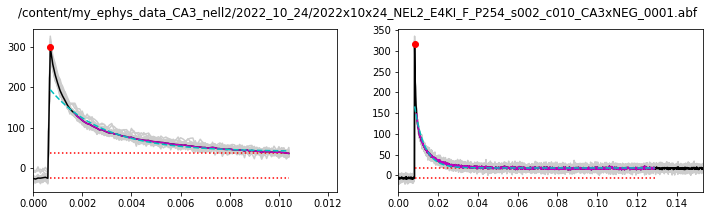

 52%|█████▏    | 81/157 [01:49<01:26,  1.14s/it]

<Figure size 432x288 with 0 Axes>

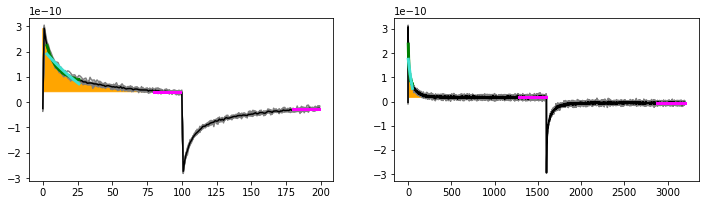

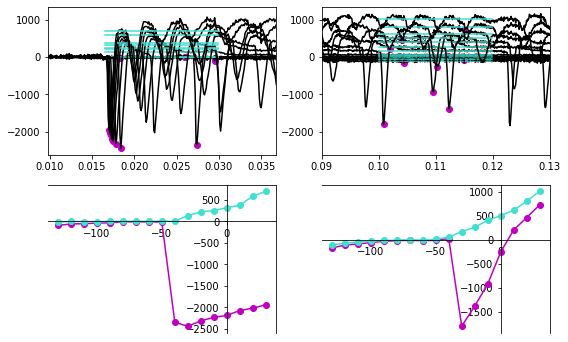

 52%|█████▏    | 82/157 [01:51<01:32,  1.23s/it]

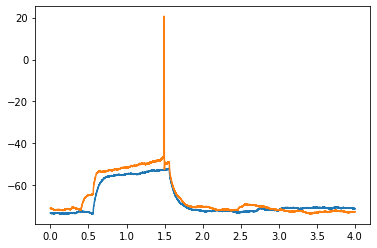

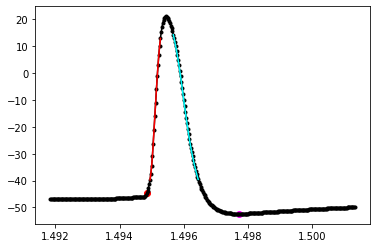

 54%|█████▎    | 84/157 [01:54<01:38,  1.35s/it]

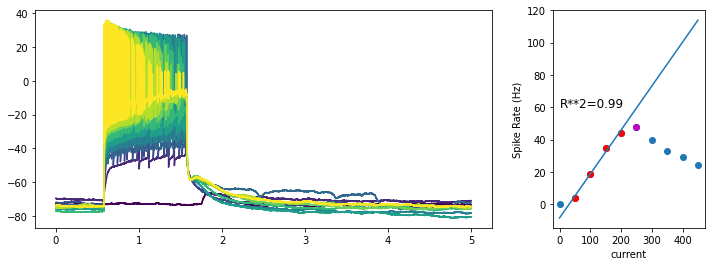

 54%|█████▍    | 85/157 [01:56<01:58,  1.64s/it]

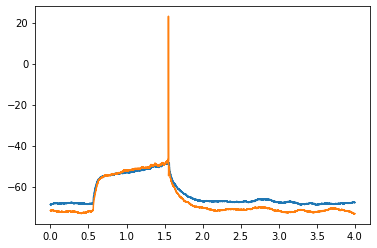

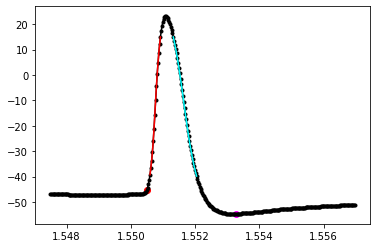

 55%|█████▍    | 86/157 [01:59<02:20,  1.98s/it]

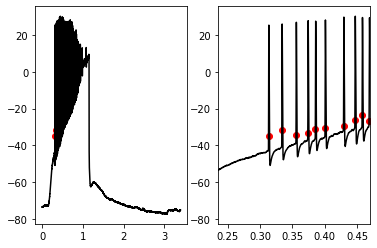

 55%|█████▌    | 87/157 [02:00<01:52,  1.61s/it]

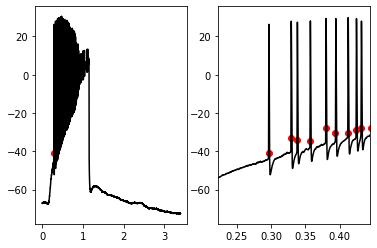

 56%|█████▌    | 88/157 [02:01<01:31,  1.33s/it]

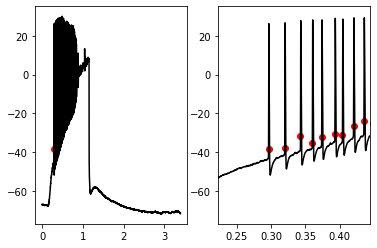

 57%|█████▋    | 89/157 [02:01<01:15,  1.11s/it]

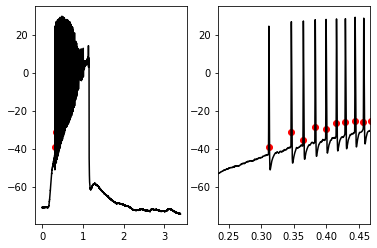

 58%|█████▊    | 91/157 [02:03<01:12,  1.10s/it]

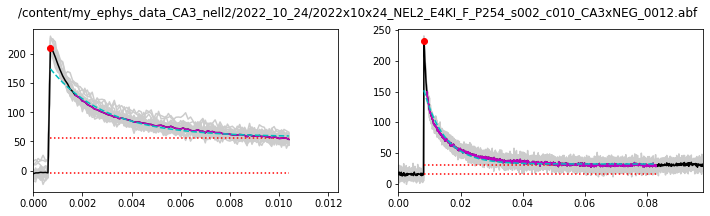

 59%|█████▊    | 92/157 [02:04<01:06,  1.02s/it]

<Figure size 432x288 with 0 Axes>

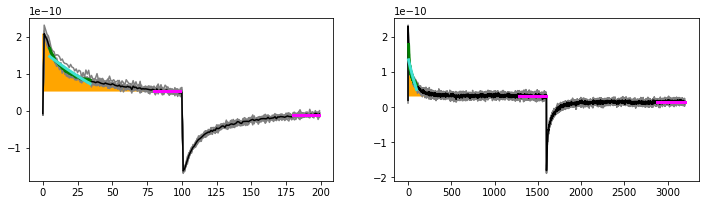

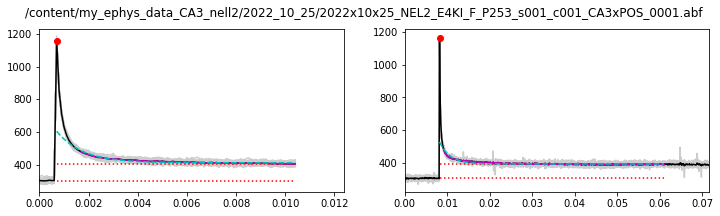

 60%|█████▉    | 94/157 [02:05<00:51,  1.23it/s]

<Figure size 432x288 with 0 Axes>

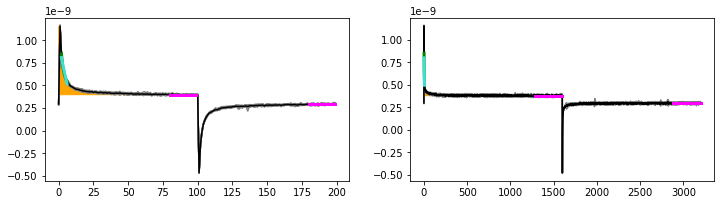

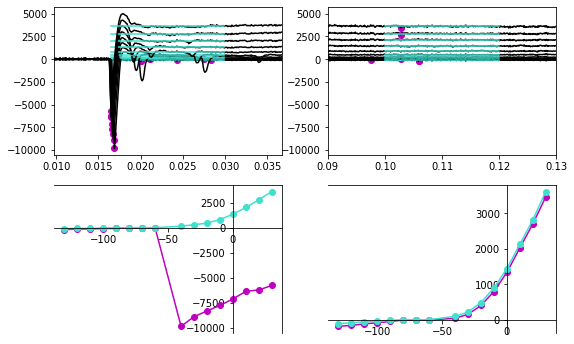

 61%|██████    | 96/157 [02:08<01:06,  1.09s/it]

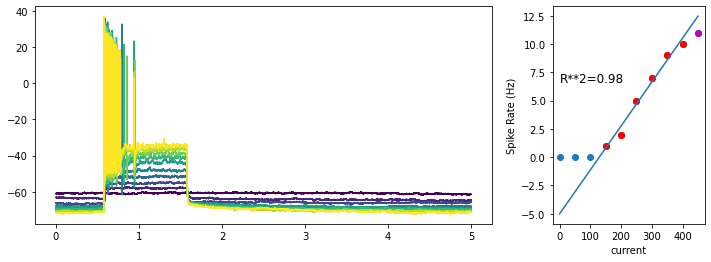

 62%|██████▏   | 97/157 [02:11<01:30,  1.51s/it]

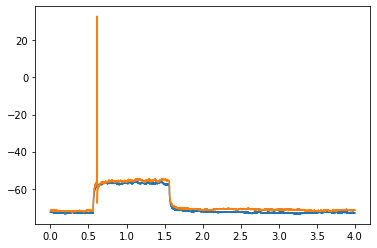

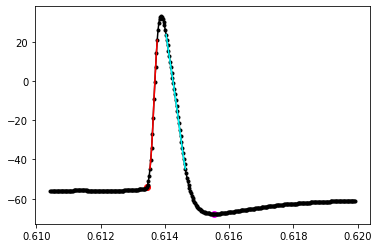

 62%|██████▏   | 98/157 [02:14<01:54,  1.94s/it]

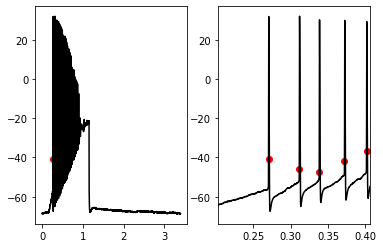

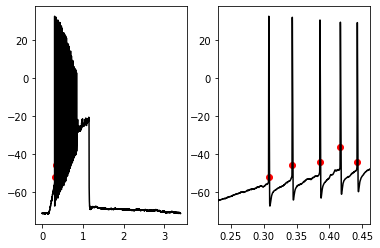

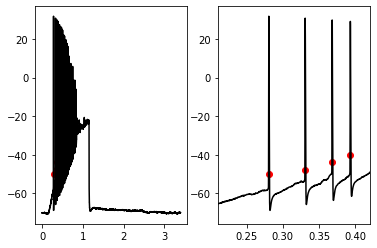

 64%|██████▎   | 100/157 [02:17<01:38,  1.73s/it]

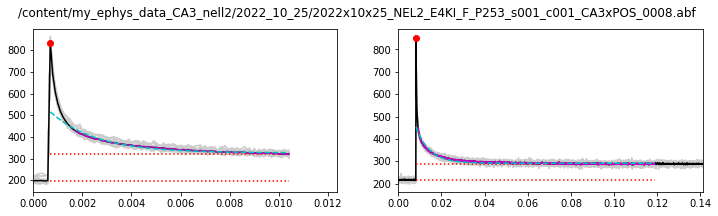

 64%|██████▍   | 101/157 [02:18<01:24,  1.51s/it]

<Figure size 432x288 with 0 Axes>

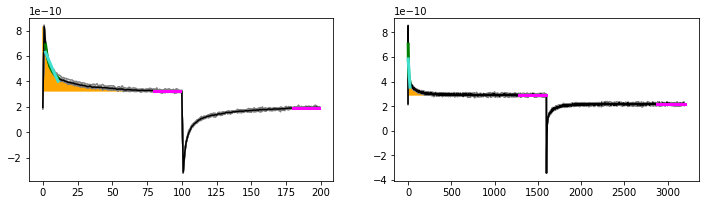

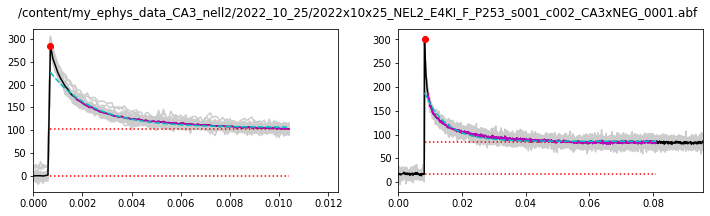

 66%|██████▌   | 103/157 [02:19<00:58,  1.09s/it]

<Figure size 432x288 with 0 Axes>

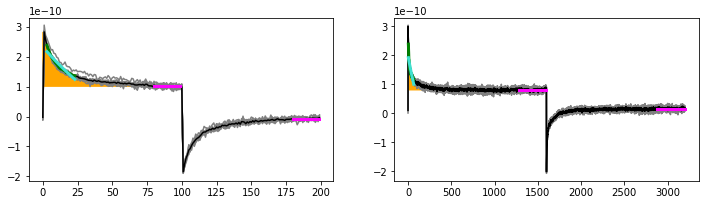

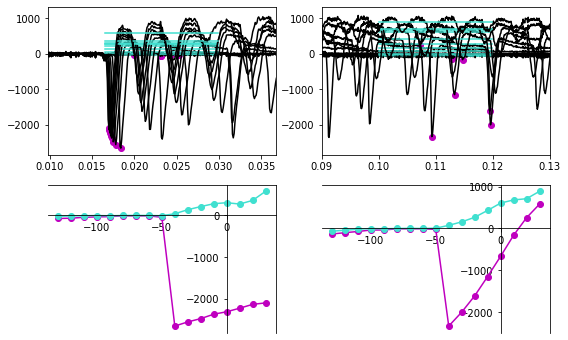

 66%|██████▌   | 104/157 [02:20<01:01,  1.15s/it]

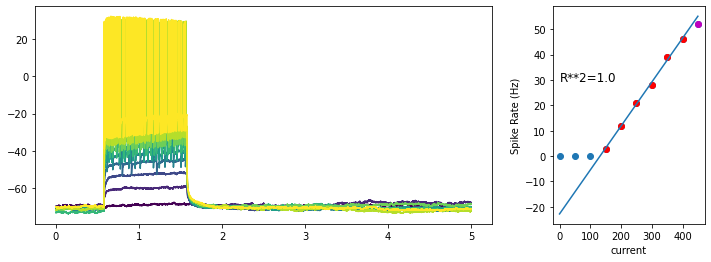

 67%|██████▋   | 105/157 [02:23<01:21,  1.57s/it]

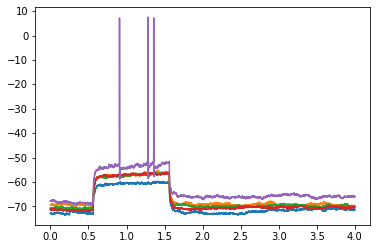

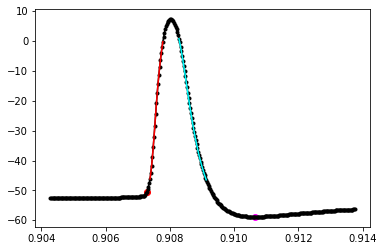

 68%|██████▊   | 106/157 [02:27<01:50,  2.16s/it]

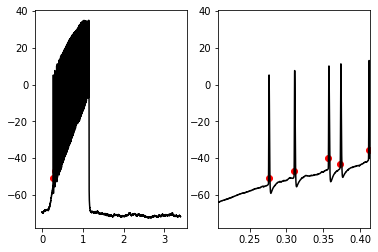

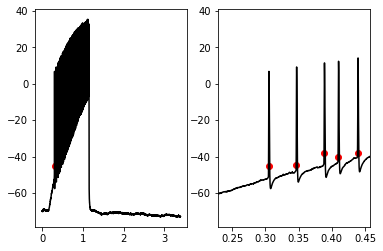

 69%|██████▉   | 109/157 [02:31<01:18,  1.64s/it]

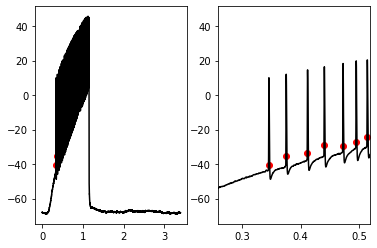

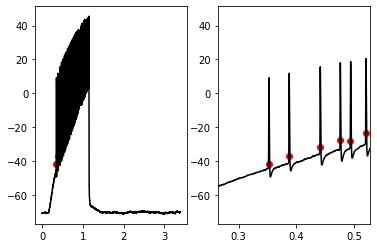

 70%|███████   | 110/157 [02:32<01:08,  1.46s/it]

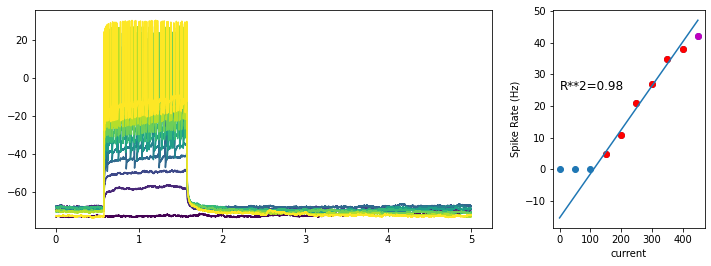

 71%|███████   | 111/157 [02:34<01:23,  1.82s/it]

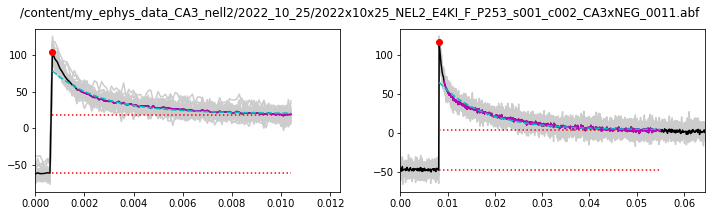

 72%|███████▏  | 113/157 [02:35<00:53,  1.21s/it]

<Figure size 432x288 with 0 Axes>

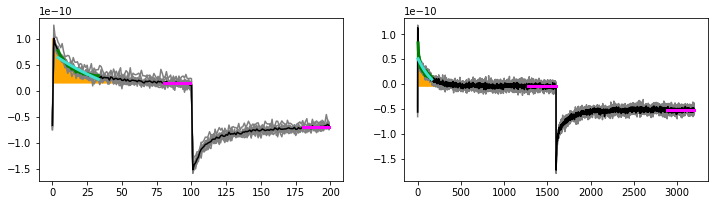

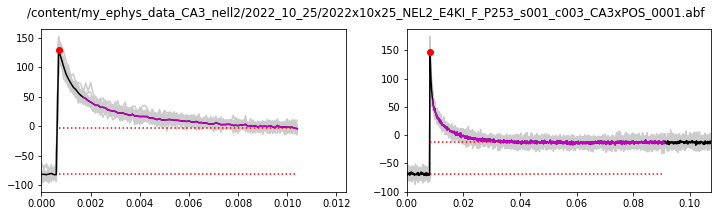

 74%|███████▍  | 116/157 [02:37<00:32,  1.25it/s]

<Figure size 432x288 with 0 Axes>

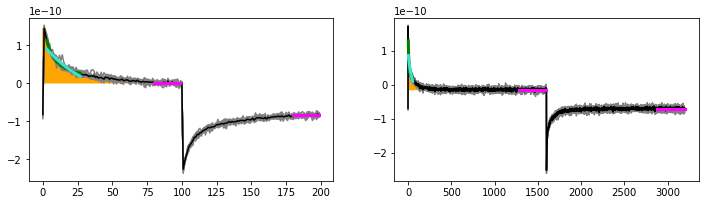

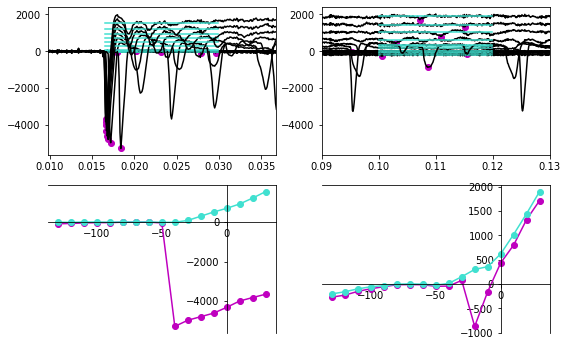

 75%|███████▍  | 117/157 [02:38<00:36,  1.10it/s]

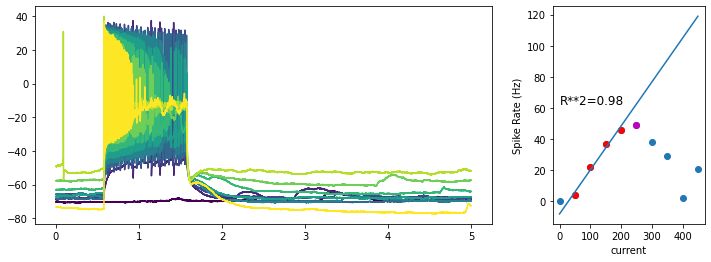

 75%|███████▌  | 118/157 [02:41<00:50,  1.28s/it]

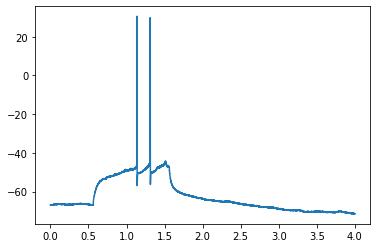

 76%|███████▌  | 119/157 [02:41<00:40,  1.06s/it]

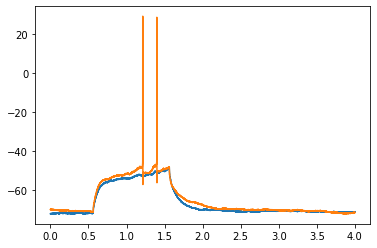

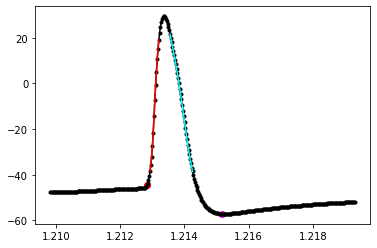

 76%|███████▋  | 120/157 [02:44<00:59,  1.61s/it]

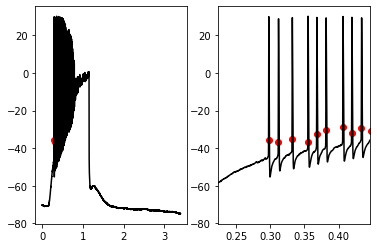

 78%|███████▊  | 122/157 [02:46<00:47,  1.35s/it]

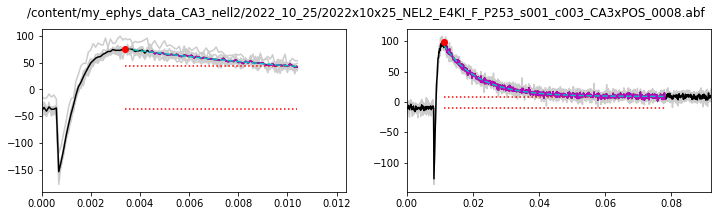

 78%|███████▊  | 123/157 [02:47<00:37,  1.09s/it]

/n error on:  my_ephys_data_CA3_nell2/2022_10_25/2022x10x25_NEL2_E4KI_F_P253_s001_c003_CA3xPOS_0008.abf


<Figure size 432x288 with 0 Axes>

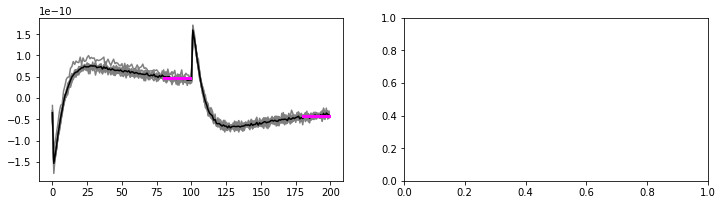

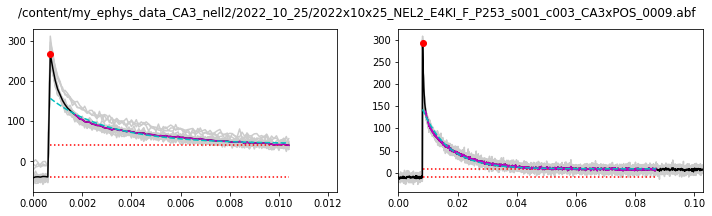

 79%|███████▉  | 124/157 [02:48<00:36,  1.11s/it]

<Figure size 432x288 with 0 Axes>

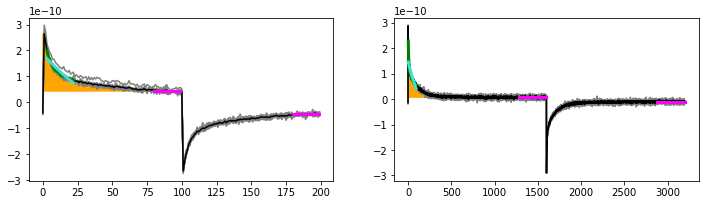

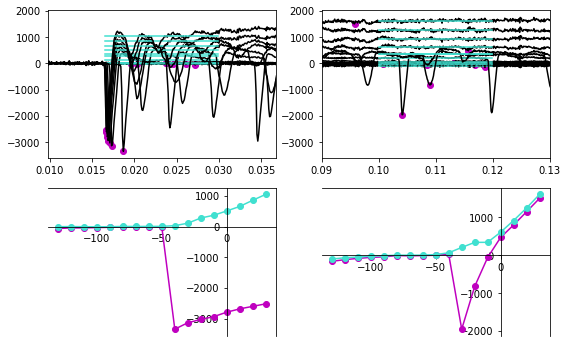

 80%|███████▉  | 125/157 [02:49<00:39,  1.23s/it]

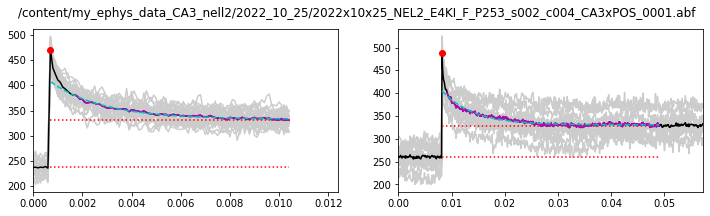

 81%|████████  | 127/157 [02:50<00:26,  1.15it/s]

<Figure size 432x288 with 0 Axes>

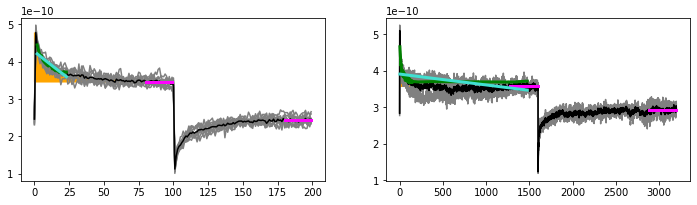

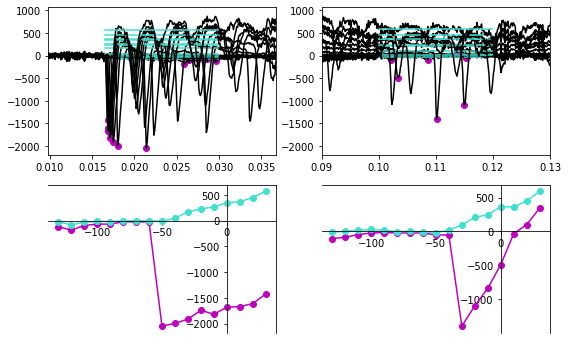

 82%|████████▏ | 128/157 [02:52<00:29,  1.01s/it]

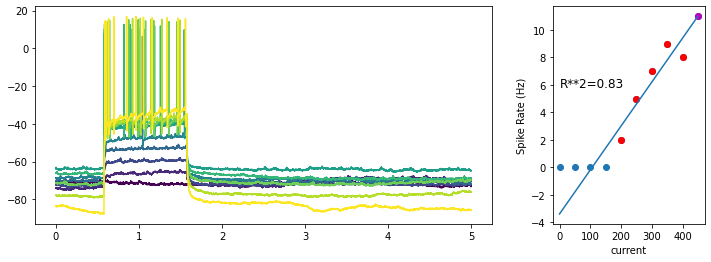

 85%|████████▍ | 133/157 [02:55<00:15,  1.52it/s]

no spikes found


 86%|████████▌ | 135/157 [02:58<00:20,  1.07it/s]

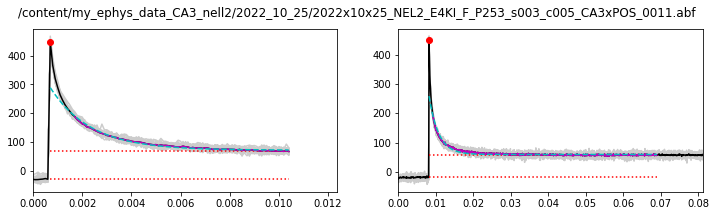

 87%|████████▋ | 137/157 [02:58<00:14,  1.34it/s]

<Figure size 432x288 with 0 Axes>

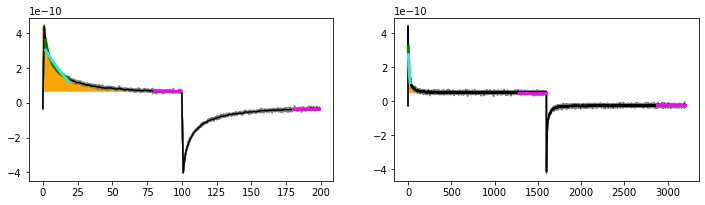

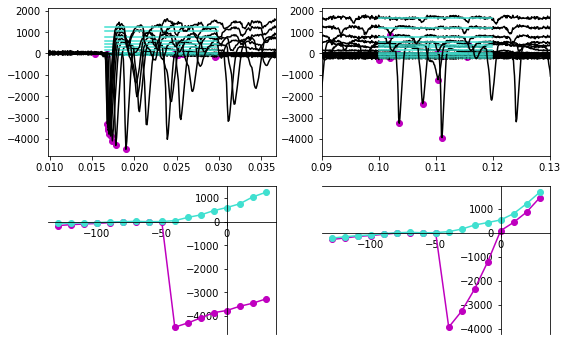

 88%|████████▊ | 138/157 [03:00<00:16,  1.12it/s]

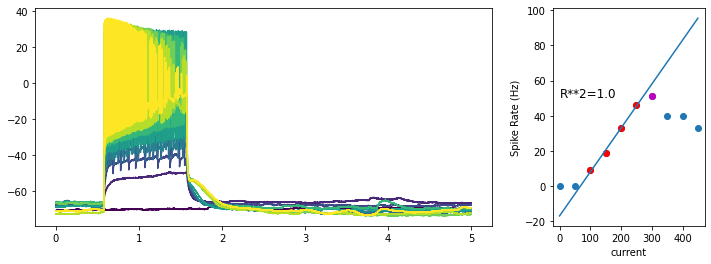

 89%|████████▊ | 139/157 [03:03<00:23,  1.30s/it]

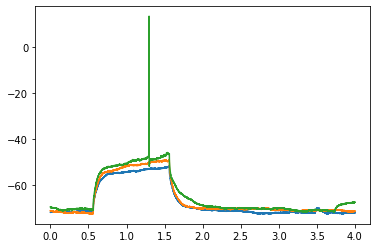

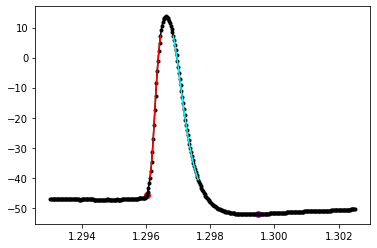

 89%|████████▉ | 140/157 [03:06<00:30,  1.81s/it]

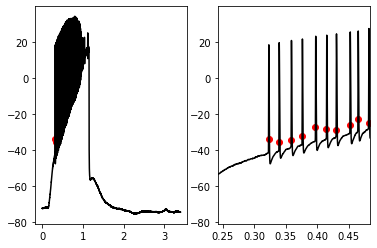

 90%|█████████ | 142/157 [03:08<00:21,  1.46s/it]

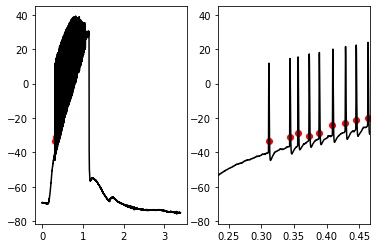

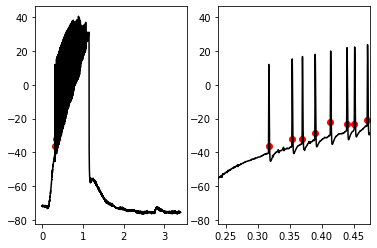

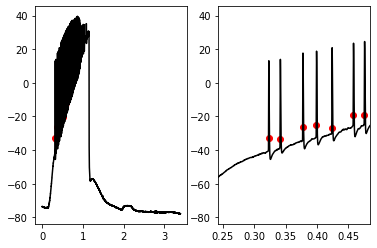

 91%|█████████ | 143/157 [03:09<00:21,  1.50s/it]

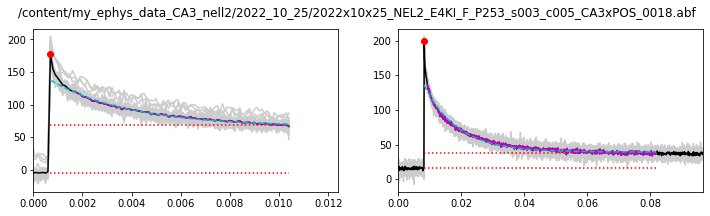

 92%|█████████▏| 144/157 [03:10<00:17,  1.36s/it]

<Figure size 432x288 with 0 Axes>

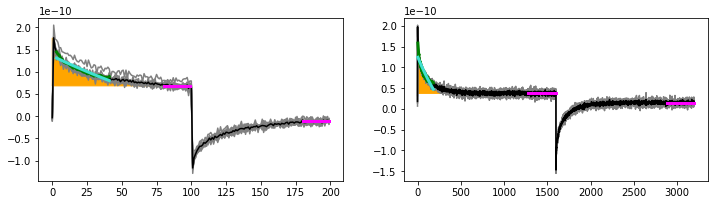

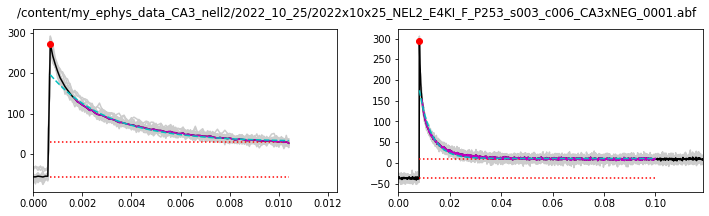

 93%|█████████▎| 146/157 [03:12<00:11,  1.02s/it]

<Figure size 432x288 with 0 Axes>

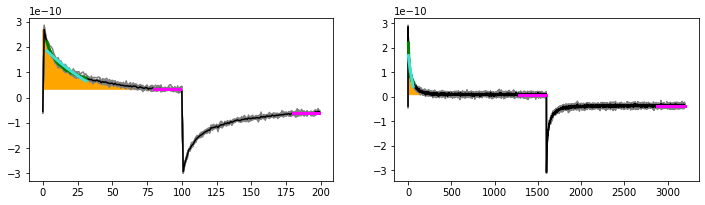

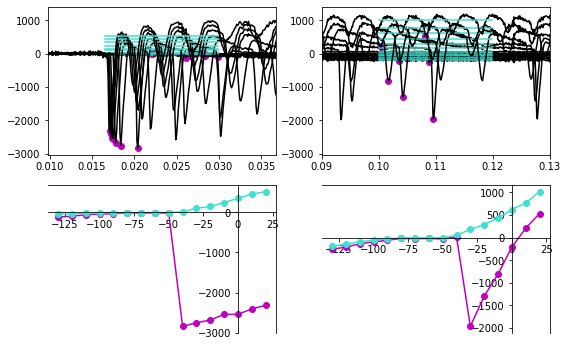

 94%|█████████▎| 147/157 [03:13<00:11,  1.13s/it]

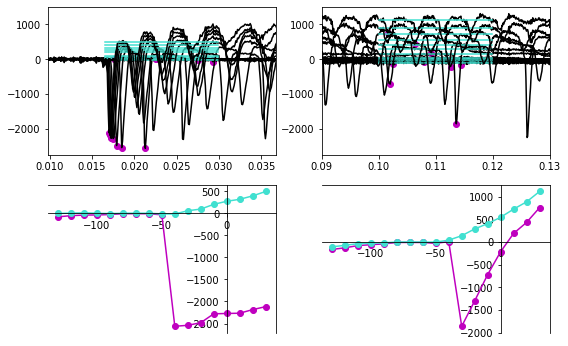

 94%|█████████▍| 148/157 [03:14<00:10,  1.13s/it]

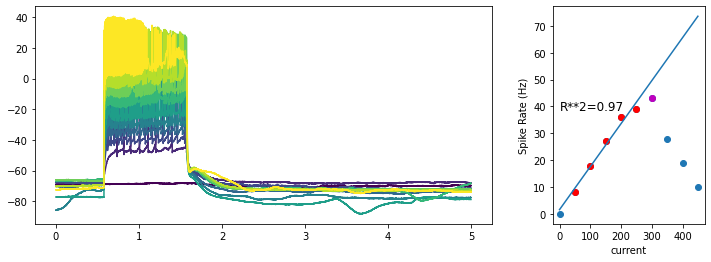

 95%|█████████▍| 149/157 [03:17<00:12,  1.56s/it]

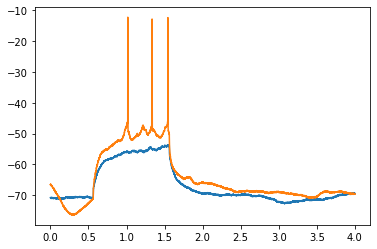

 96%|█████████▌| 151/157 [03:18<00:06,  1.06s/it]

no spikes found
no spikes found


 97%|█████████▋| 152/157 [03:20<00:05,  1.16s/it]

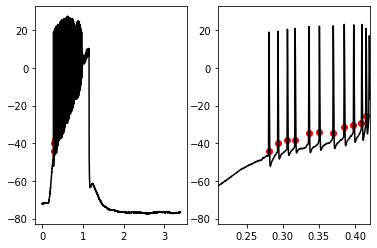

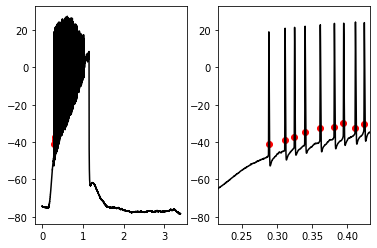

 98%|█████████▊| 154/157 [03:22<00:03,  1.22s/it]

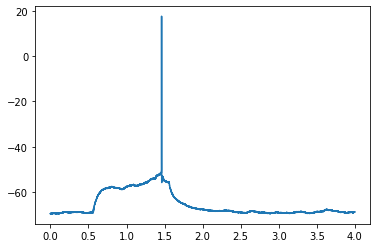

 99%|█████████▊| 155/157 [03:22<00:01,  1.07it/s]

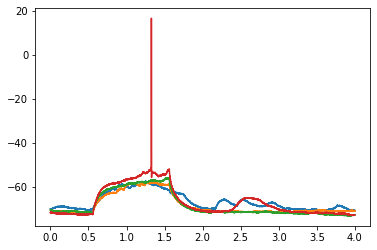

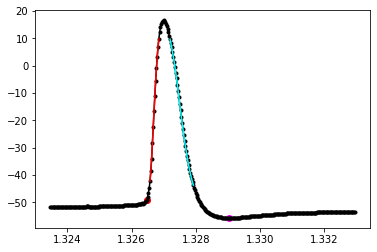

 99%|█████████▉| 156/157 [03:26<00:01,  1.69s/it]

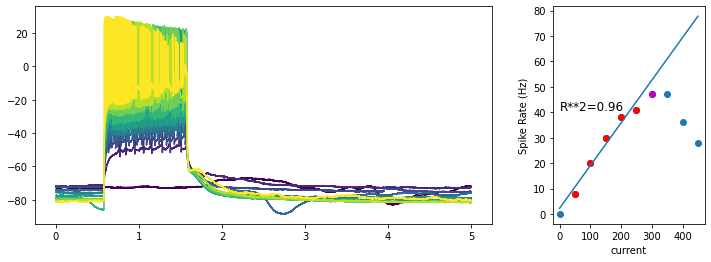

100%|██████████| 157/157 [03:28<00:00,  1.33s/it]


problem_recs
     my_ephys_data_CA3_nell2/2022_10_25/2022x10x25_NEL2_E4KI_F_P253_s001_c003_CA3xPOS_0008.abf
  adding: content/Saved_Figs/ (stored 0%)
  adding: content/Saved_Figs/IV_Curves/ (stored 0%)
  adding: content/Saved_Figs/IV_Curves/IV_Curves_2022x10x25_NEL2_E4KI_F_P253_s001_c002_CA3xNEG_0002.png (deflated 5%)
  adding: content/Saved_Figs/IV_Curves/IV_Curves_2022x10x24_NEL2_E4KI_F_P254_s001_c007_CA3xPOS_0002.png (deflated 5%)
  adding: content/Saved_Figs/IV_Curves/IV_Curves_2022x10x25_NEL2_E4KI_F_P253_s003_c006_CA3xNEG_0003.png (deflated 5%)
  adding: content/Saved_Figs/IV_Curves/IV_Curves_2022x10x24_NEL2_E4KI_F_P254_s002_c010_CA3xNEG_0002.png (deflated 5%)
  adding: content/Saved_Figs/IV_Curves/IV_Curves_2022x10x24_NEL2_E4KI_F_P254_s001_c004_CA3xNEG_0002.png (deflated 5%)
  adding: content/Saved_Figs/IV_Curves/IV_Curves_2022x10x24_NEL2_E4KI_F_P254_s001_c002_CA3xNEG_0002.png (deflated 5%)
  adding: content/Saved_Figs/IV_Curves/IV_Curves_2022x10x25_NEL2_E4KI_F_P253_s003_c006_CA3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
dataset = {'data_name': 'CA3_nell2',
           'data_source': "https://www.dropbox.com/sh/kdyo8a4gy4krpp8/AAD-ra8gZJpdsEKq-jk-Yk_da?dl=0",
           'file_naming_scheme': ['Rec_date','Virus','GenoType','Sex','Age','Slice_Num','Cell_num','Cell_Type'],
           }

Fast_results = crispy_mouse_wrap(dataset,VC_prot,IC_prot,strat_cols=[ 'Cell_Type'])

In [4]:
Fast_results.keys()

dict_keys(['abf_recordings_df', 'protocol_set', 'problem_recs', 'cell_df', 'cell_df_con', 'cell_df_nd', 'cell_df_csv', 'cell_df_csv_abrg', 'strat_df_dict'])